# Building Models

Predicting the closing stock price of Reliance

In [4]:
import yfinance as yf
from datetime import datetime
ticker = "RS"
start = "2000-03-01"
end = datetime.now()
df = yf.download(tickers=ticker, start= start, end= end)


[*********************100%%**********************]  1 of 1 completed


In [5]:
# here we are printing shape of data
df.shape

(6071, 6)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-01,9.687500,10.312500,9.687500,10.125000,7.049354,60200
2000-03-02,10.062500,10.156250,9.875000,9.875000,6.875296,16600
2000-03-03,9.750000,10.093750,9.625000,10.093750,7.027596,19400
2000-03-06,10.031250,10.062500,8.812500,9.000000,6.266091,121800
2000-03-07,9.125000,9.375000,9.125000,9.281250,6.461909,70800
...,...,...,...,...,...,...
2024-04-11,331.119995,332.559998,328.429993,330.750000,330.750000,194500
2024-04-12,329.290009,329.950012,324.880005,325.529999,325.529999,182000
2024-04-15,329.920013,330.459991,323.399994,325.230011,325.230011,175800


Create a new data frame with only the closing price and convert it to an array. Here we are taking about 80% of the data as the training data.

In [7]:
import math

Now let's scale the data set to be values between 0 and 1 inclusive.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

2024-04-18 17:33:49.224804: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 17:33:49.226836: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 17:33:49.253960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 17:33:49.253992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 17:33:49.254679: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [9]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close']).values

# Define the percentage of data to be used for training
train_percentage = 0.8

# Calculate the number of rows to use for training
train_size = int(len(data) * train_percentage)


In [10]:
# Scale the training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(data[:train_size])


In [11]:
# Prepare the training data
X_train, y_train = [], []
window_size = 365  # Define the size of the rolling window
for i in range(window_size, len(scaled_train_data)):
    X_train.append(scaled_train_data[i-window_size:i, 0])
    y_train.append(scaled_train_data[i, 0])


In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [13]:
X_train

array([[[0.03768649],
        [0.03490314],
        [0.03733857],
        ...,
        [0.07498331],
        [0.07581831],
        [0.07325763]],

       [[0.03490314],
        [0.03733857],
        [0.02516144],
        ...,
        [0.07581831],
        [0.07325763],
        [0.07509463]],

       [[0.03733857],
        [0.02516144],
        [0.0282927 ],
        ...,
        [0.07325763],
        [0.07509463],
        [0.07693164]],

       ...,

       [[0.90347363],
        [0.90770429],
        [0.91393903],
        ...,
        [0.91661102],
        [0.92195508],
        [0.91516371]],

       [[0.90770429],
        [0.91393903],
        [0.9097083 ],
        ...,
        [0.92195508],
        [0.91516371],
        [0.89879763]],

       [[0.91393903],
        [0.9097083 ],
        [0.92340239],
        ...,
        [0.91516371],
        [0.89879763],
        [0.91872639]]])

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

4491/4491 [==============================] - 741s 165ms/step - loss: 0.0014


In [16]:
scaled_test_data = scaler.transform(data[train_size - window_size:])
# x_test = []


In [17]:
scaled_test_data.shape

(1580, 1)

In [18]:
scaled_test_data[59]

array([0.87140953])

In [19]:
predScaledTestData = scaled_test_data.copy()

In [20]:
predScaledTestData[59]

array([0.87140953])

In [21]:
data.shape

(6071, 1)

In [22]:
test_size = data.shape[0] - train_size

In [23]:
print(test_size,len(scaled_test_data))
# comes out to be exactly 60 more which is what we want

1215 1580


In [24]:
for i in range(3,10+1):
    x = range(i-3,i)
    print(*x,"Iter",i)

0 1 2 Iter 3
1 2 3 Iter 4
2 3 4 Iter 5
3 4 5 Iter 6
4 5 6 Iter 7
5 6 7 Iter 8
6 7 8 Iter 9
7 8 9 Iter 10


In [25]:
scaled_test_data

array([[0.9097083 ],
       [0.92340239],
       [0.91516371],
       ...,
       [3.54586973],
       [3.51970622],
       [3.51124475]])

In [26]:
scaled_test_data[0,0]

0.9097082964804704

In [27]:
predScaledTestData[60]

array([0.86606547])

In [28]:
scaled_test_data[60]

array([0.86606547])

In [29]:
prediciton = []
actualY = []
predY = []
j = 0
for i in range(window_size, test_size+1):
    testpredX = []
    testpredX.append(predScaledTestData[i-window_size:window_size+j,0])
    actualY.append(scaled_test_data[i,0])

    # Convert testpredX to numpy arrays
    testpredX = np.array(testpredX)

    # Reshape testpredX for input to LSTM model
    testpredX = np.reshape(testpredX, (1, window_size, 1))
    
    # Predict next value
    predicted_price = model.predict(testpredX)

    predY.append(predicted_price) # to visualize
    predScaledTestData[i] = predicted_price
    j += 1


1/1 [==============================] - 0s 30ms/step


In [30]:
checkdf = pd.DataFrame({"Prediction":predY, "Actual":actualY})

In [31]:
checkdf["Prediction"] = checkdf["Prediction"].apply(lambda x : x[0][0])

In [32]:
checkdf["Prediction"]

0      0.927382
1      0.931635
2      0.936209
3      0.940957
4      0.945792
         ...   
846    1.219347
847    1.219347
848    1.219347
849    1.219347
850    1.219347
Name: Prediction, Length: 851, dtype: float32

In [33]:
checkdf

,Prediction,Actual
0,0.927382,0.932643
1,0.931635,0.930194
2,0.936209,0.924627
3,0.940957,0.923736
4,0.945792,0.949789
...,...,...
846,1.219347,2.150523
847,1.219347,2.146404
848,1.219347,2.168114
849,1.219347,2.208083


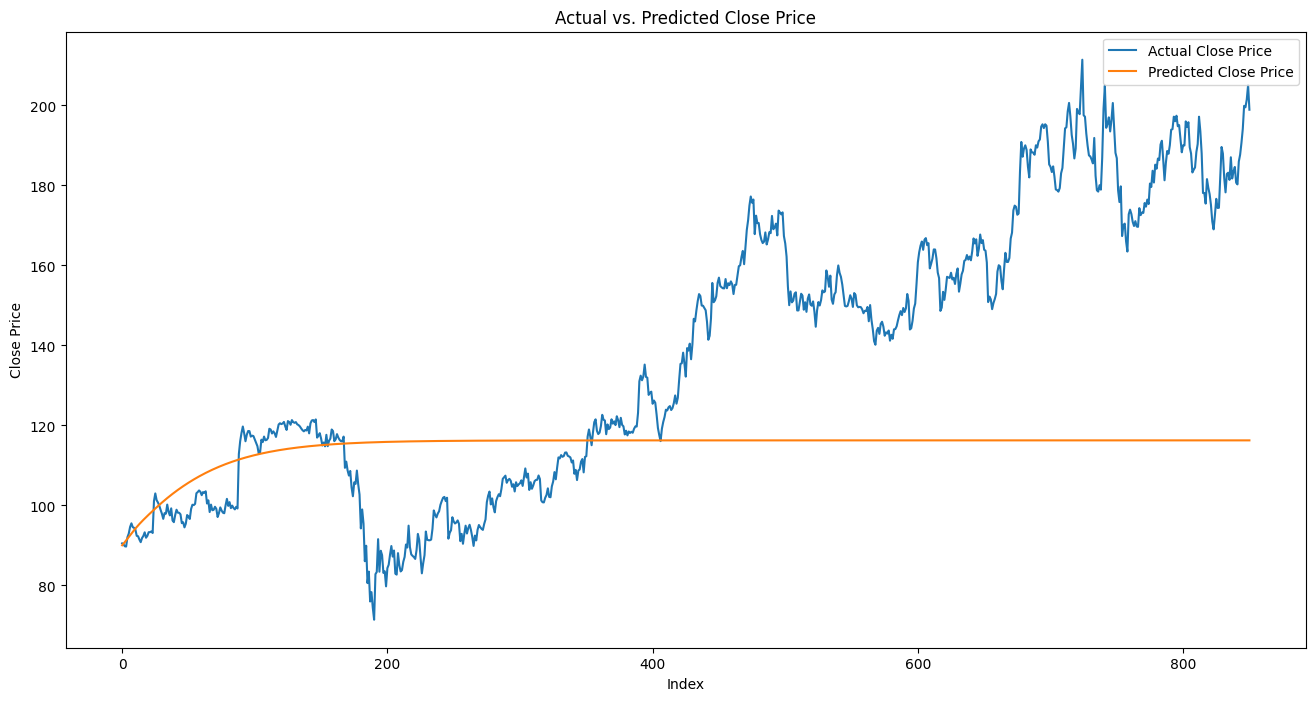

In [34]:
import matplotlib.pyplot as plt

# Inverse transform the scaled values
checkdf['Prediction'] = scaler.inverse_transform(checkdf[['Prediction']])
checkdf['Actual'] = scaler.inverse_transform(checkdf[['Actual']])

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(checkdf['Actual'], label='Actual Close Price')
plt.plot(checkdf['Prediction'], label='Predicted Close Price')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Evaluation

Lets calculate the r2 score of our model for evaluation

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(valid["Close"], valid["Predictions"])

NameError: name 'valid' is not defined

In [ ]:
r2

0.9937106223816641

In [3]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
from fbprophet import Prophet
import yfinance as yf

# Download historical stock data using yfinance
stock_symbol = 'AAPL'  # Example stock symbol (Apple Inc.)
start_date = '2020-01-01'  # Start date for historical data
end_date = '2022-01-01'  # End date for historical data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Prepare the data for Prophet
df = stock_data.reset_index()[['Date', 'Close']]
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year (365 days)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'fbprophet'

In [7]:
!conda install libpython m2w64-toolchain -c msys2

Error while loading conda entry point: conda-libmamba-solver (libarchive.so.19: cannot open shared object file: No such file or directory)

CondaValueError: You have chosen a non-default solver backend (libmamba) but it was not recognized. Choose one of: classic



In [6]:
!conda config --set channel_priority strict


Error while loading conda entry point: conda-libmamba-solver (libarchive.so.19: cannot open shared object file: No such file or directory)


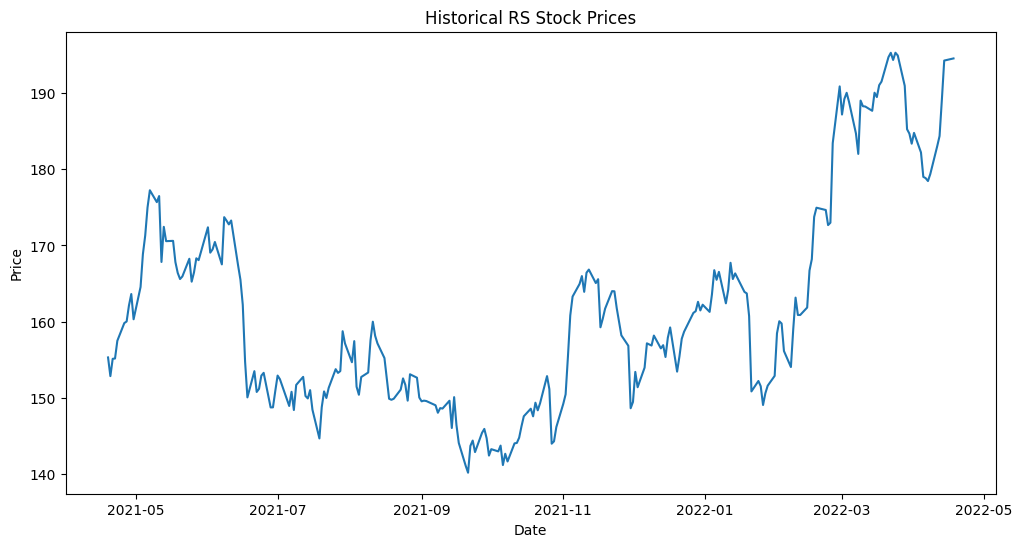

/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

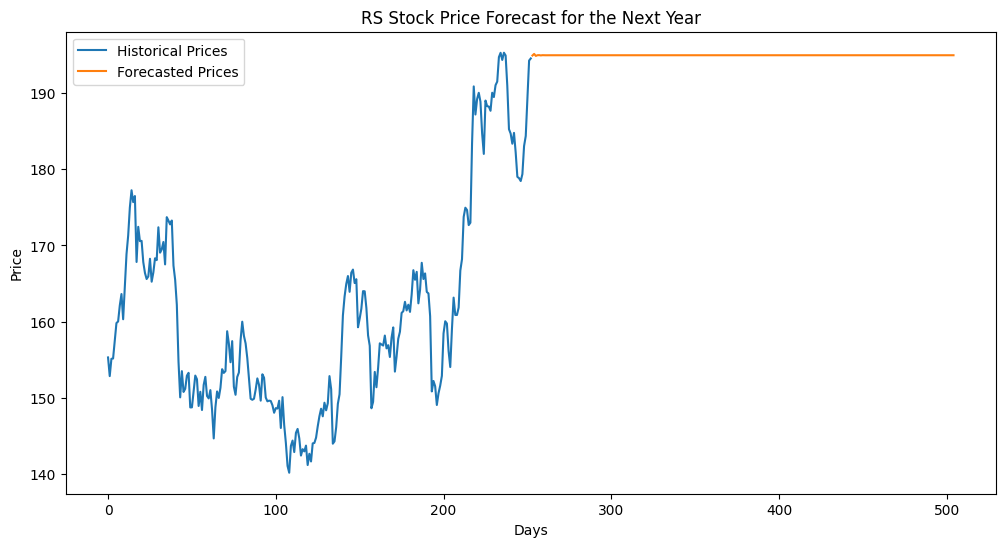

Mean Squared Error: 1322.3885215587868


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Download RS stock data from Yahoo Finance
rs_data = yf.download('RS', start='2021-04-19', end='2022-04-19', progress=False)

# Take the 'Close' prices for prediction
rs_close = rs_data['Close']

# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(rs_close)
plt.title('Historical RS Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Define the ARIMA model
model = ARIMA(rs_close, order=(5, 1, 0))  # ARIMA(p, d, q) order

# Fit the model
model_fit = model.fit()

# Forecast the next 1 year (252 trading days)
forecast = model_fit.forecast(steps=252)

# Plot the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(rs_close)), rs_close, label='Historical Prices')
plt.plot(np.arange(len(rs_close), len(rs_close) + len(forecast)), forecast, label='Forecasted Prices')
plt.title('RS Stock Price Forecast for the Next Year')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(rs_close[-252:], forecast)
print(f'Mean Squared Error: {mse}')


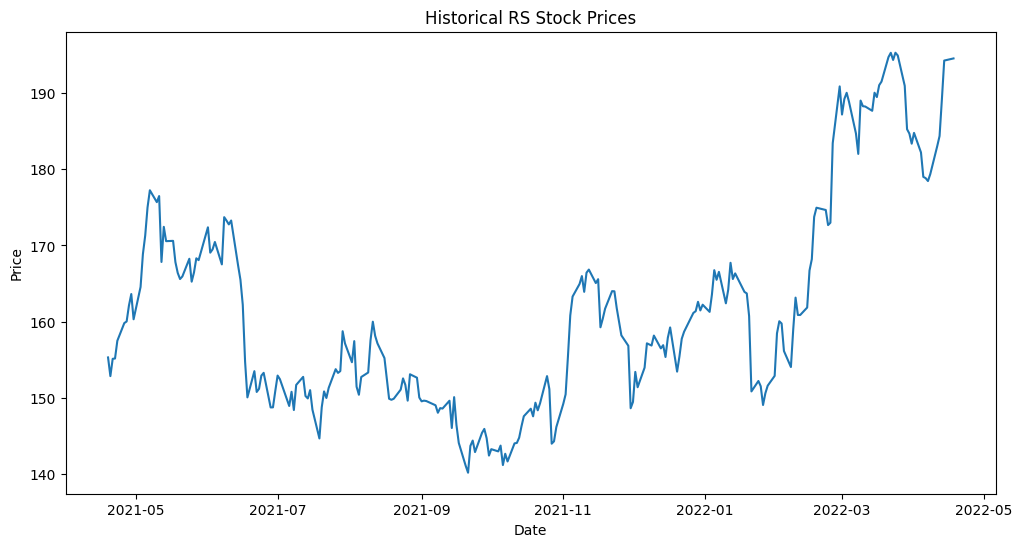

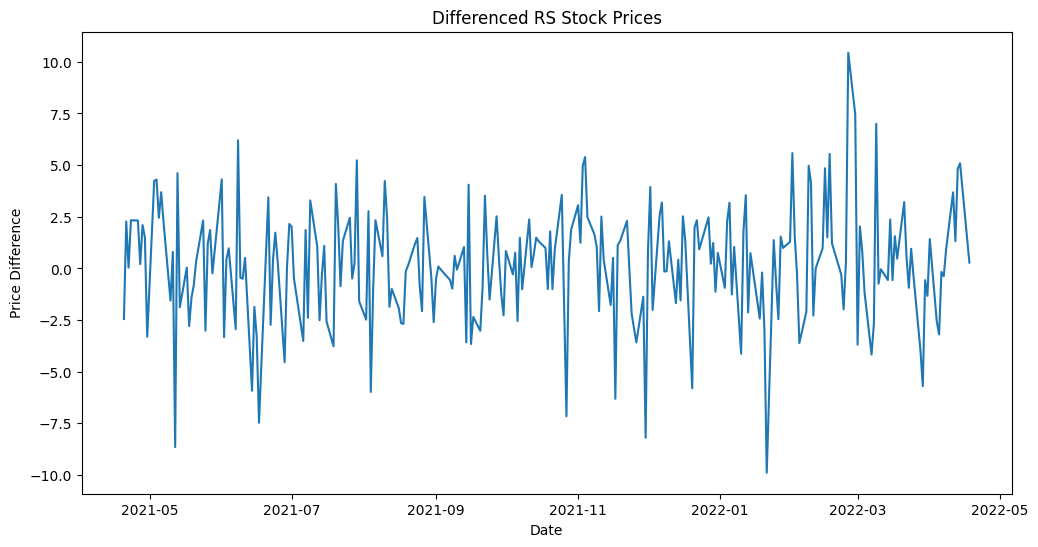

/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/its_relative/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

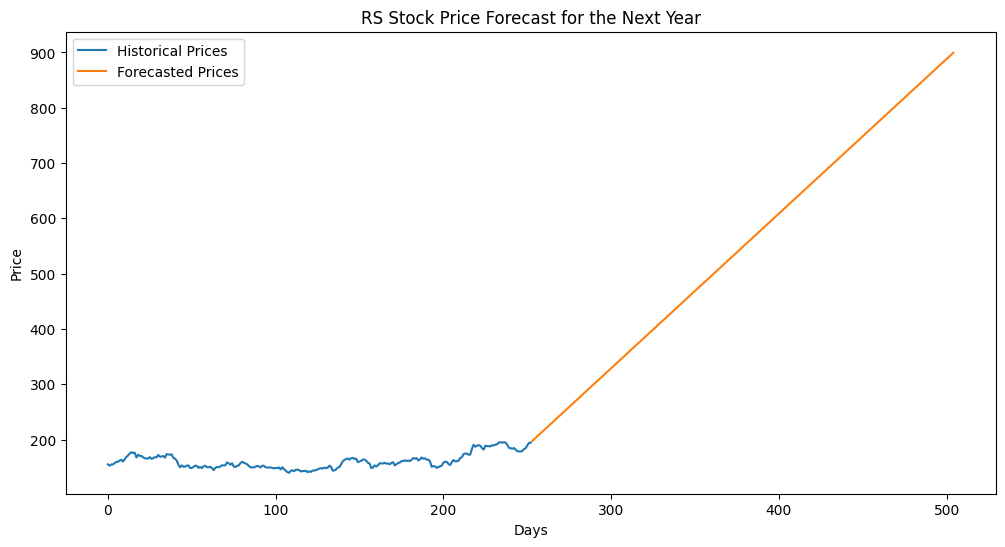

Mean Squared Error: 189088.0586995849


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Download RS stock data from Yahoo Finance
rs_data = yf.download('RS', start='2021-04-19', end='2022-04-19', progress=False)

# Take the 'Close' prices for prediction
rs_close = rs_data['Close']

# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(rs_close)
plt.title('Historical RS Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Make the data stationary by differencing
rs_close_diff = rs_close.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(rs_close_diff)
plt.title('Differenced RS Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

# Define the ARIMA model
model = ARIMA(rs_close_diff, order=(5, 1, 0))  # ARIMA(p, d, q) order

# Fit the model
model_fit = model.fit()

# Forecast the next 1 year (252 trading days)
forecast = model_fit.forecast(steps=252)

# Calculate the inverse difference to obtain actual forecasted prices
forecasted_prices = np.cumsum(forecast)
last_known_price = rs_close.iloc[-1]
forecasted_prices = forecasted_prices + last_known_price

# Plot the forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(rs_close)), rs_close, label='Historical Prices')
plt.plot(np.arange(len(rs_close), len(rs_close) + len(forecasted_prices)), forecasted_prices, label='Forecasted Prices')
plt.title('RS Stock Price Forecast for the Next Year')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(rs_close[-252:], forecasted_prices[:252])
print(f'Mean Squared Error: {mse}')
